### Description: This program classifies a person as having a cardiovascular disease or not.

#### Cardiovascular Disease : Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.

#### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns  
import os

#### load the data

In [ ]:
os.chdir("C:/Users/Trishu/Desktop/Python_project_for_CV/Heart_disease_Detection")
df = pd.read_csv("cardiovascular.csv")

#### Store the data into a variable

In [ ]:
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0


#### Get the shape of the data

In [ ]:
df.shape

(70000, 13)

#### Count the empty values in each column

In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Another way to check for any null or missing values

In [ ]:
df.isnull().values.any()

False

#### View some basic statictics

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Get a count of the number of patients with a cardiovascular disease and without


In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

#### Visualize the count

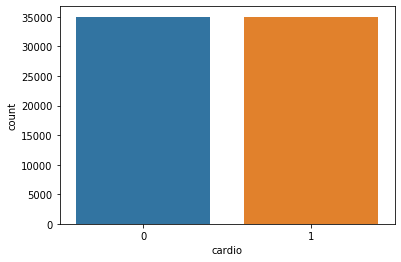

In [ ]:
sns.countplot(df['cardio'])

 #### Look at the number of people with a cardiovascular disease that exceed the number of people without a cardiovascular disease

#### Create a years column

In [ ]:
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')

#### Visualize the data

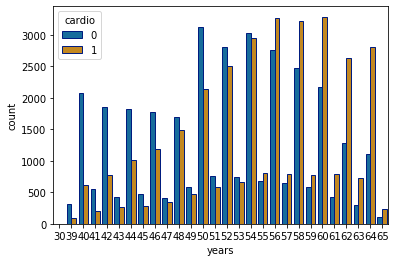

In [ ]:
sns.countplot(x = 'years', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

#### Get the correlation of the columns

In [ ]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001831,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053682,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155412,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290966,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001831,0.053682,0.155412,0.290966,1.000000,0.030702,0.043711,0.141763,0.106859,0.067779,0.067115,-0.016865,0.181656,0.053659
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043711,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141763,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106859,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067779,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


#### Visualize the data

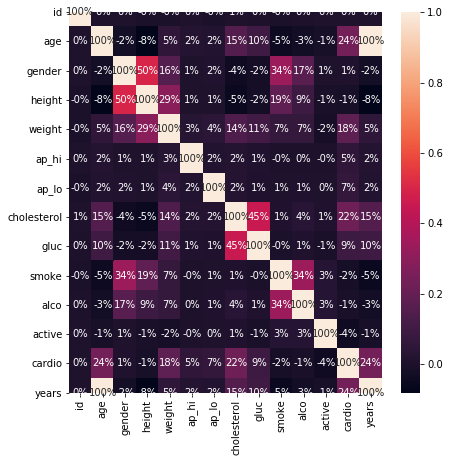

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

#### Remove or drop the years column

In [ ]:
df = df.drop('years', axis = 1)

#### Remove or drop the id column

In [ ]:
df = df.drop('id', axis = 1)

NameError: name 'df' is not defined

#### Split the data into feature data and target data

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

#### Split the data again, into 70% training data set and 30% testing data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

#### Feature Scaling

#### Scale the values in the data to be values between 0 and 1 inclusive

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Using Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### Test the models accuaracy on the training data set

In [ ]:
model = forest 
model.score(X_train, Y_train)

0.9793673469387755

#### Test the models accuracy on the test data set

#### Using Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)

[[7890 2462]
 [3783 6865]]


In [ ]:
print('Model Test Accuracy = {}'.format((TP + TN)/(TP + TN + FP + FN)))

Model Test Accuracy = 0.7026190476190476
